In [1]:
#Plot for the duopoly price discrimination model with loyalty and costs: Infinite horizon Mult Loyalty ML case
#this is applicable only for uniform F and when delta_a = delta_b = delta_F (hardcode)

%load_ext autoreload
%autoreload 2
from utils.imports import *
from utils.infinite_horizon import *
from utils.utils import *

In [2]:
#keep cb fixed
flag_theory = True
flag_plot = True
cb     = 0.2
la     =   3
lb     =   4
deltaf = 0.4 #common discount function
ca_arr = np.linspace(cb+.4,2,10) #np.linspace(cb,2,50) #ensure ca >= cb
dist = 'uniform'
ca_m_cb_arr = ca_arr - cb
maxpx=ca_arr.max()+5
npts=100

In [12]:
ca_arr.max()

2.0

In [3]:
df = ml_get_metric_arrs_vs_camcb(ca_arr,cb,la,lb,dist,deltaf,flag_theory=flag_theory,maxpx=maxpx,npts=npts,show_progress=False,plot_path=False)

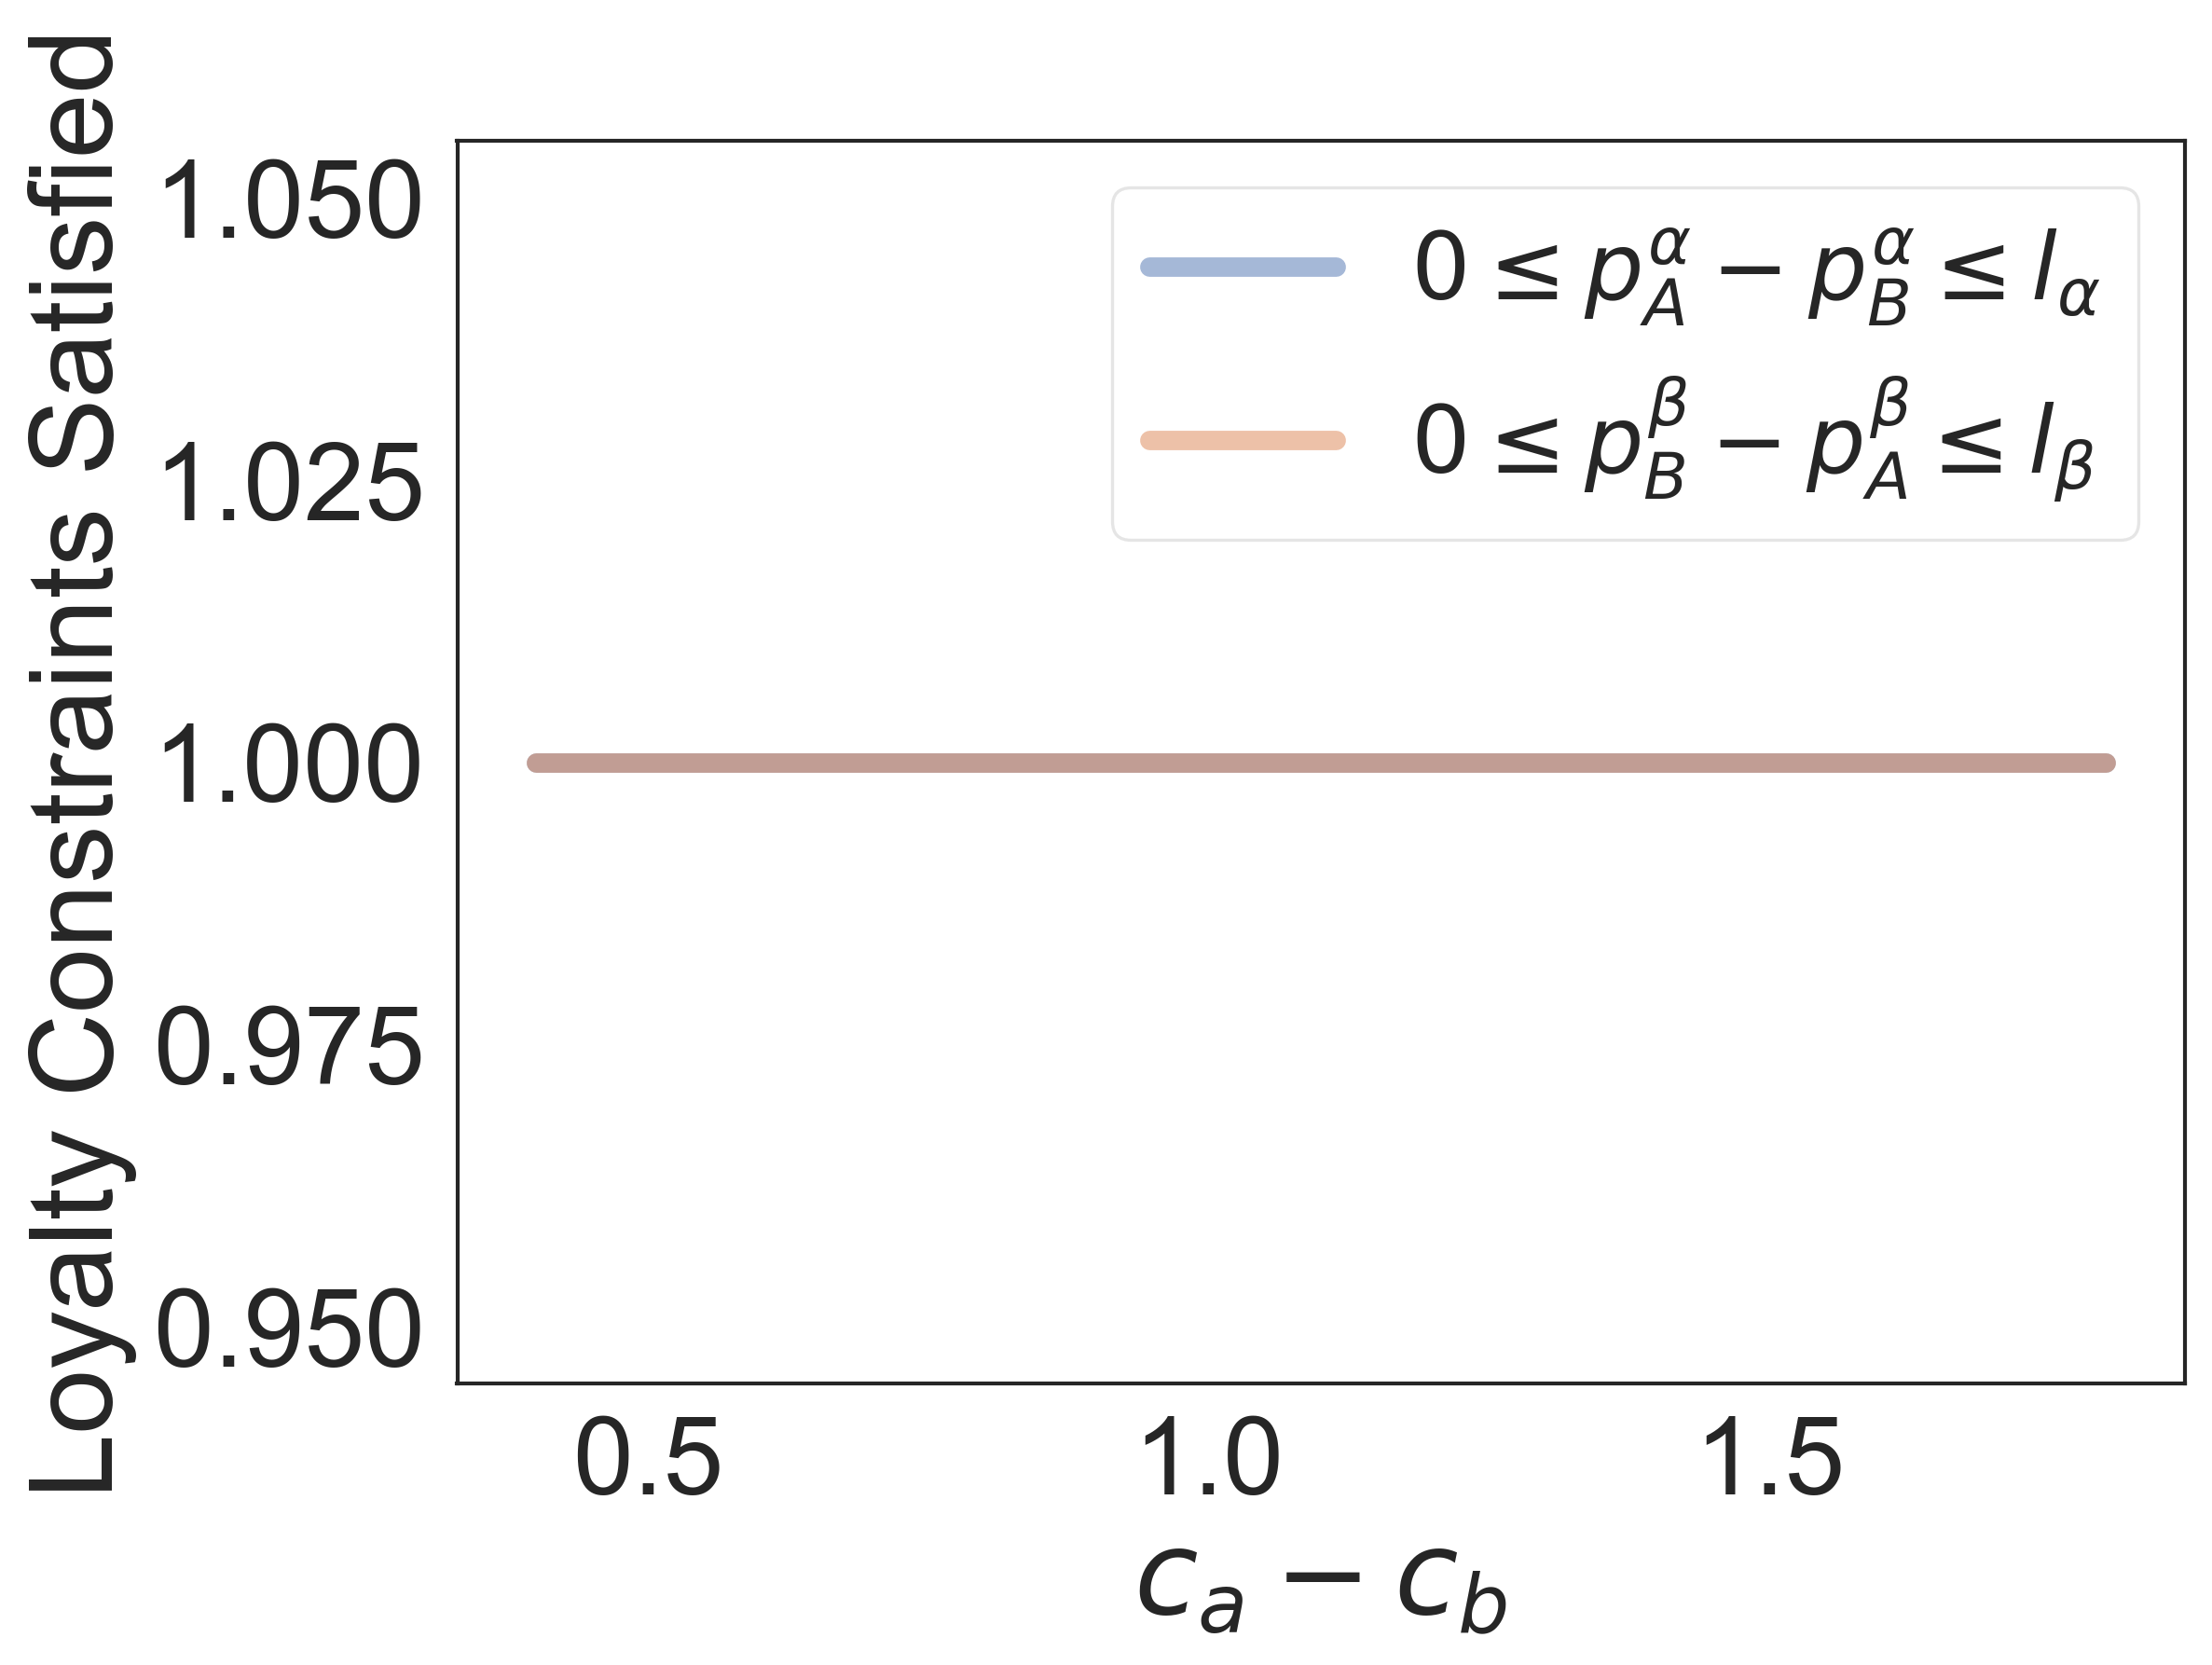

In [4]:
# plot of price constraints indicator functions
labels_constraints_ml=[r'$0 \leq p_{A}^{\alpha} - p_{B}^{\alpha} \leq l_{\alpha}$',r'$0 \leq p_{B}^{\beta} - p_{A}^{\beta} \leq l_{\beta}$']
fname_constraints_ml = "./output/ml_ih_fm_constraints_ml.png" if flag_plot else None
plot_curves_vs_camcb(df['constraint_aa_ba_arr'],df['constraint_bb_ab_arr'],ca_m_cb_arr,'Loyalty Constraints Satisfied',labels_constraints_ml,None,None,fname_constraints_ml)

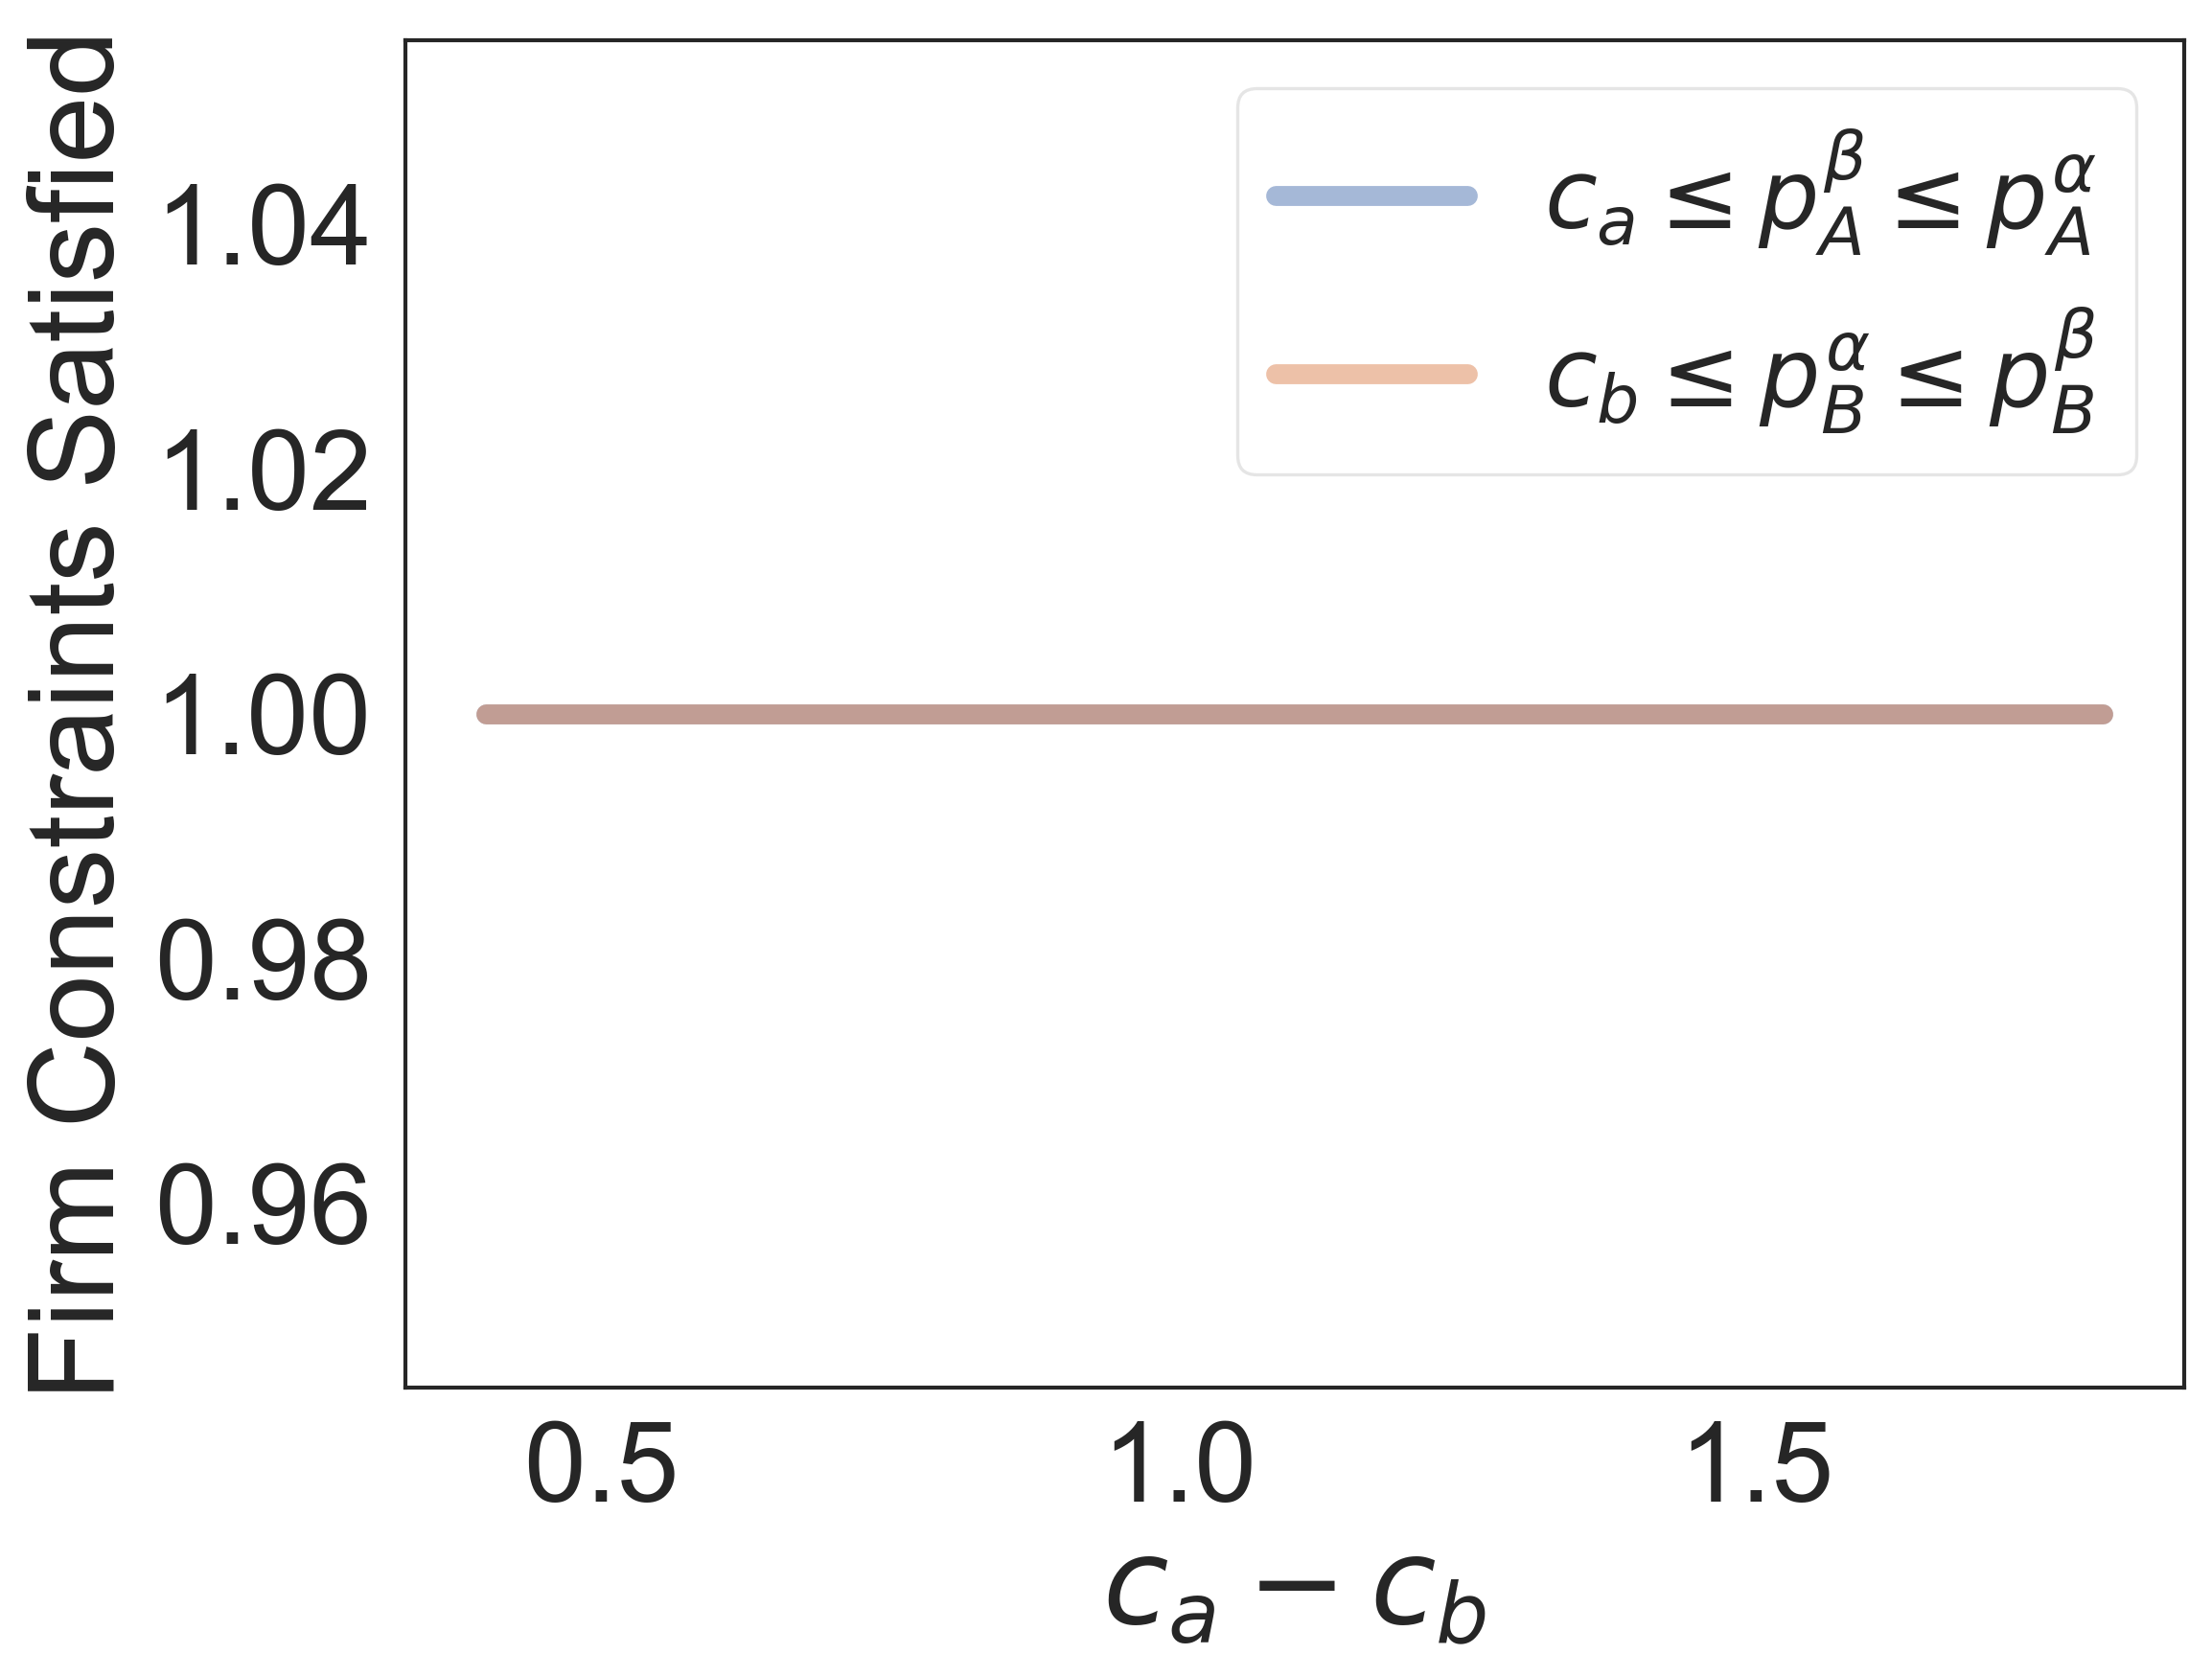

In [5]:
# plot of price constraints indicator functions
labels_constraints_firm=[r'$c_a \leq p_{A}^{\beta} \leq p_{A}^{\alpha}$',r'$c_b \leq p_{B}^{\alpha} \leq p_{B}^{\beta}$']
fname_constraints_firm = "./output/ml_ih_fm_constraints_firm.png" if flag_plot else None
plot_curves_vs_camcb(df['constraint_cross_a_arr'],df['constraint_cross_a_arr'],ca_m_cb_arr,'Firm Constraints Satisfied',labels_constraints_firm,None,None,fname_constraints_firm)

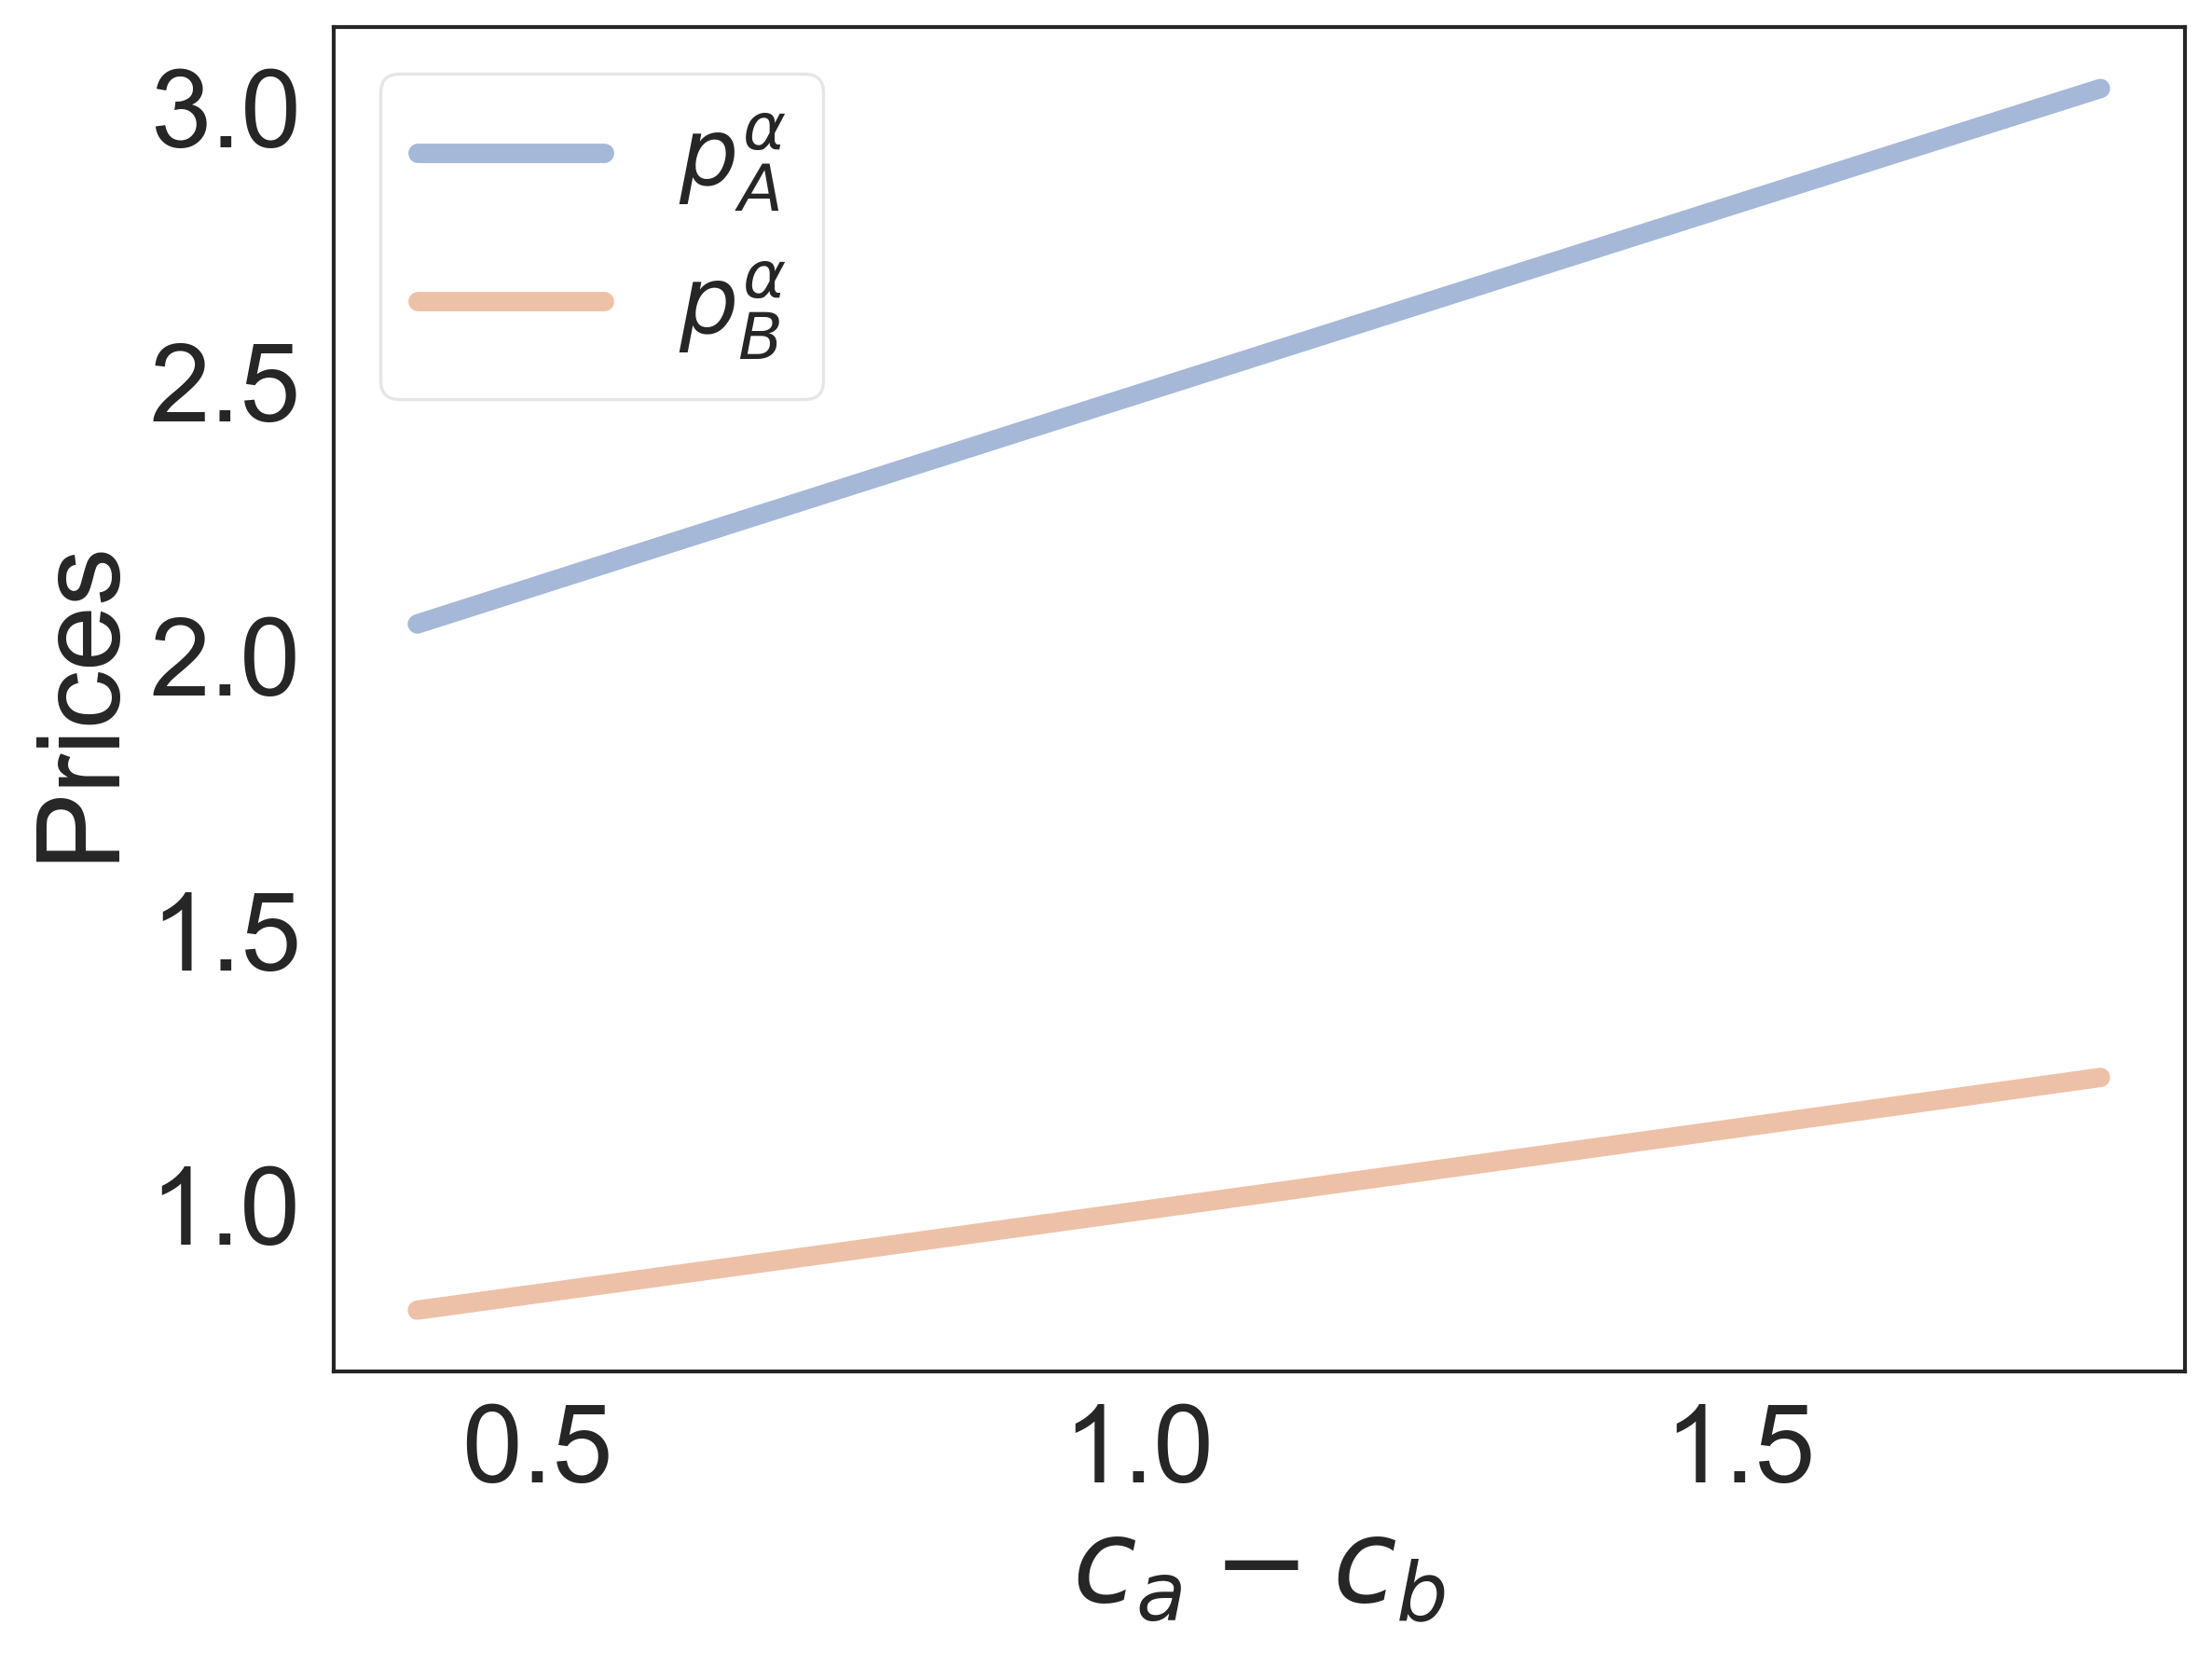

In [6]:
# plot of prices paa and pba
labels_prices_a=[r'$p_{A}^{\alpha}$',r'$p_{B}^{\alpha}$']
fname_prices_a = "./output/ml_ih_fm_paa_pba.png" if flag_plot else None
plot_curves_vs_camcb(df['paa'],df['pba'],ca_m_cb_arr,'Prices',labels_prices_a,None,None,fname_prices_a)

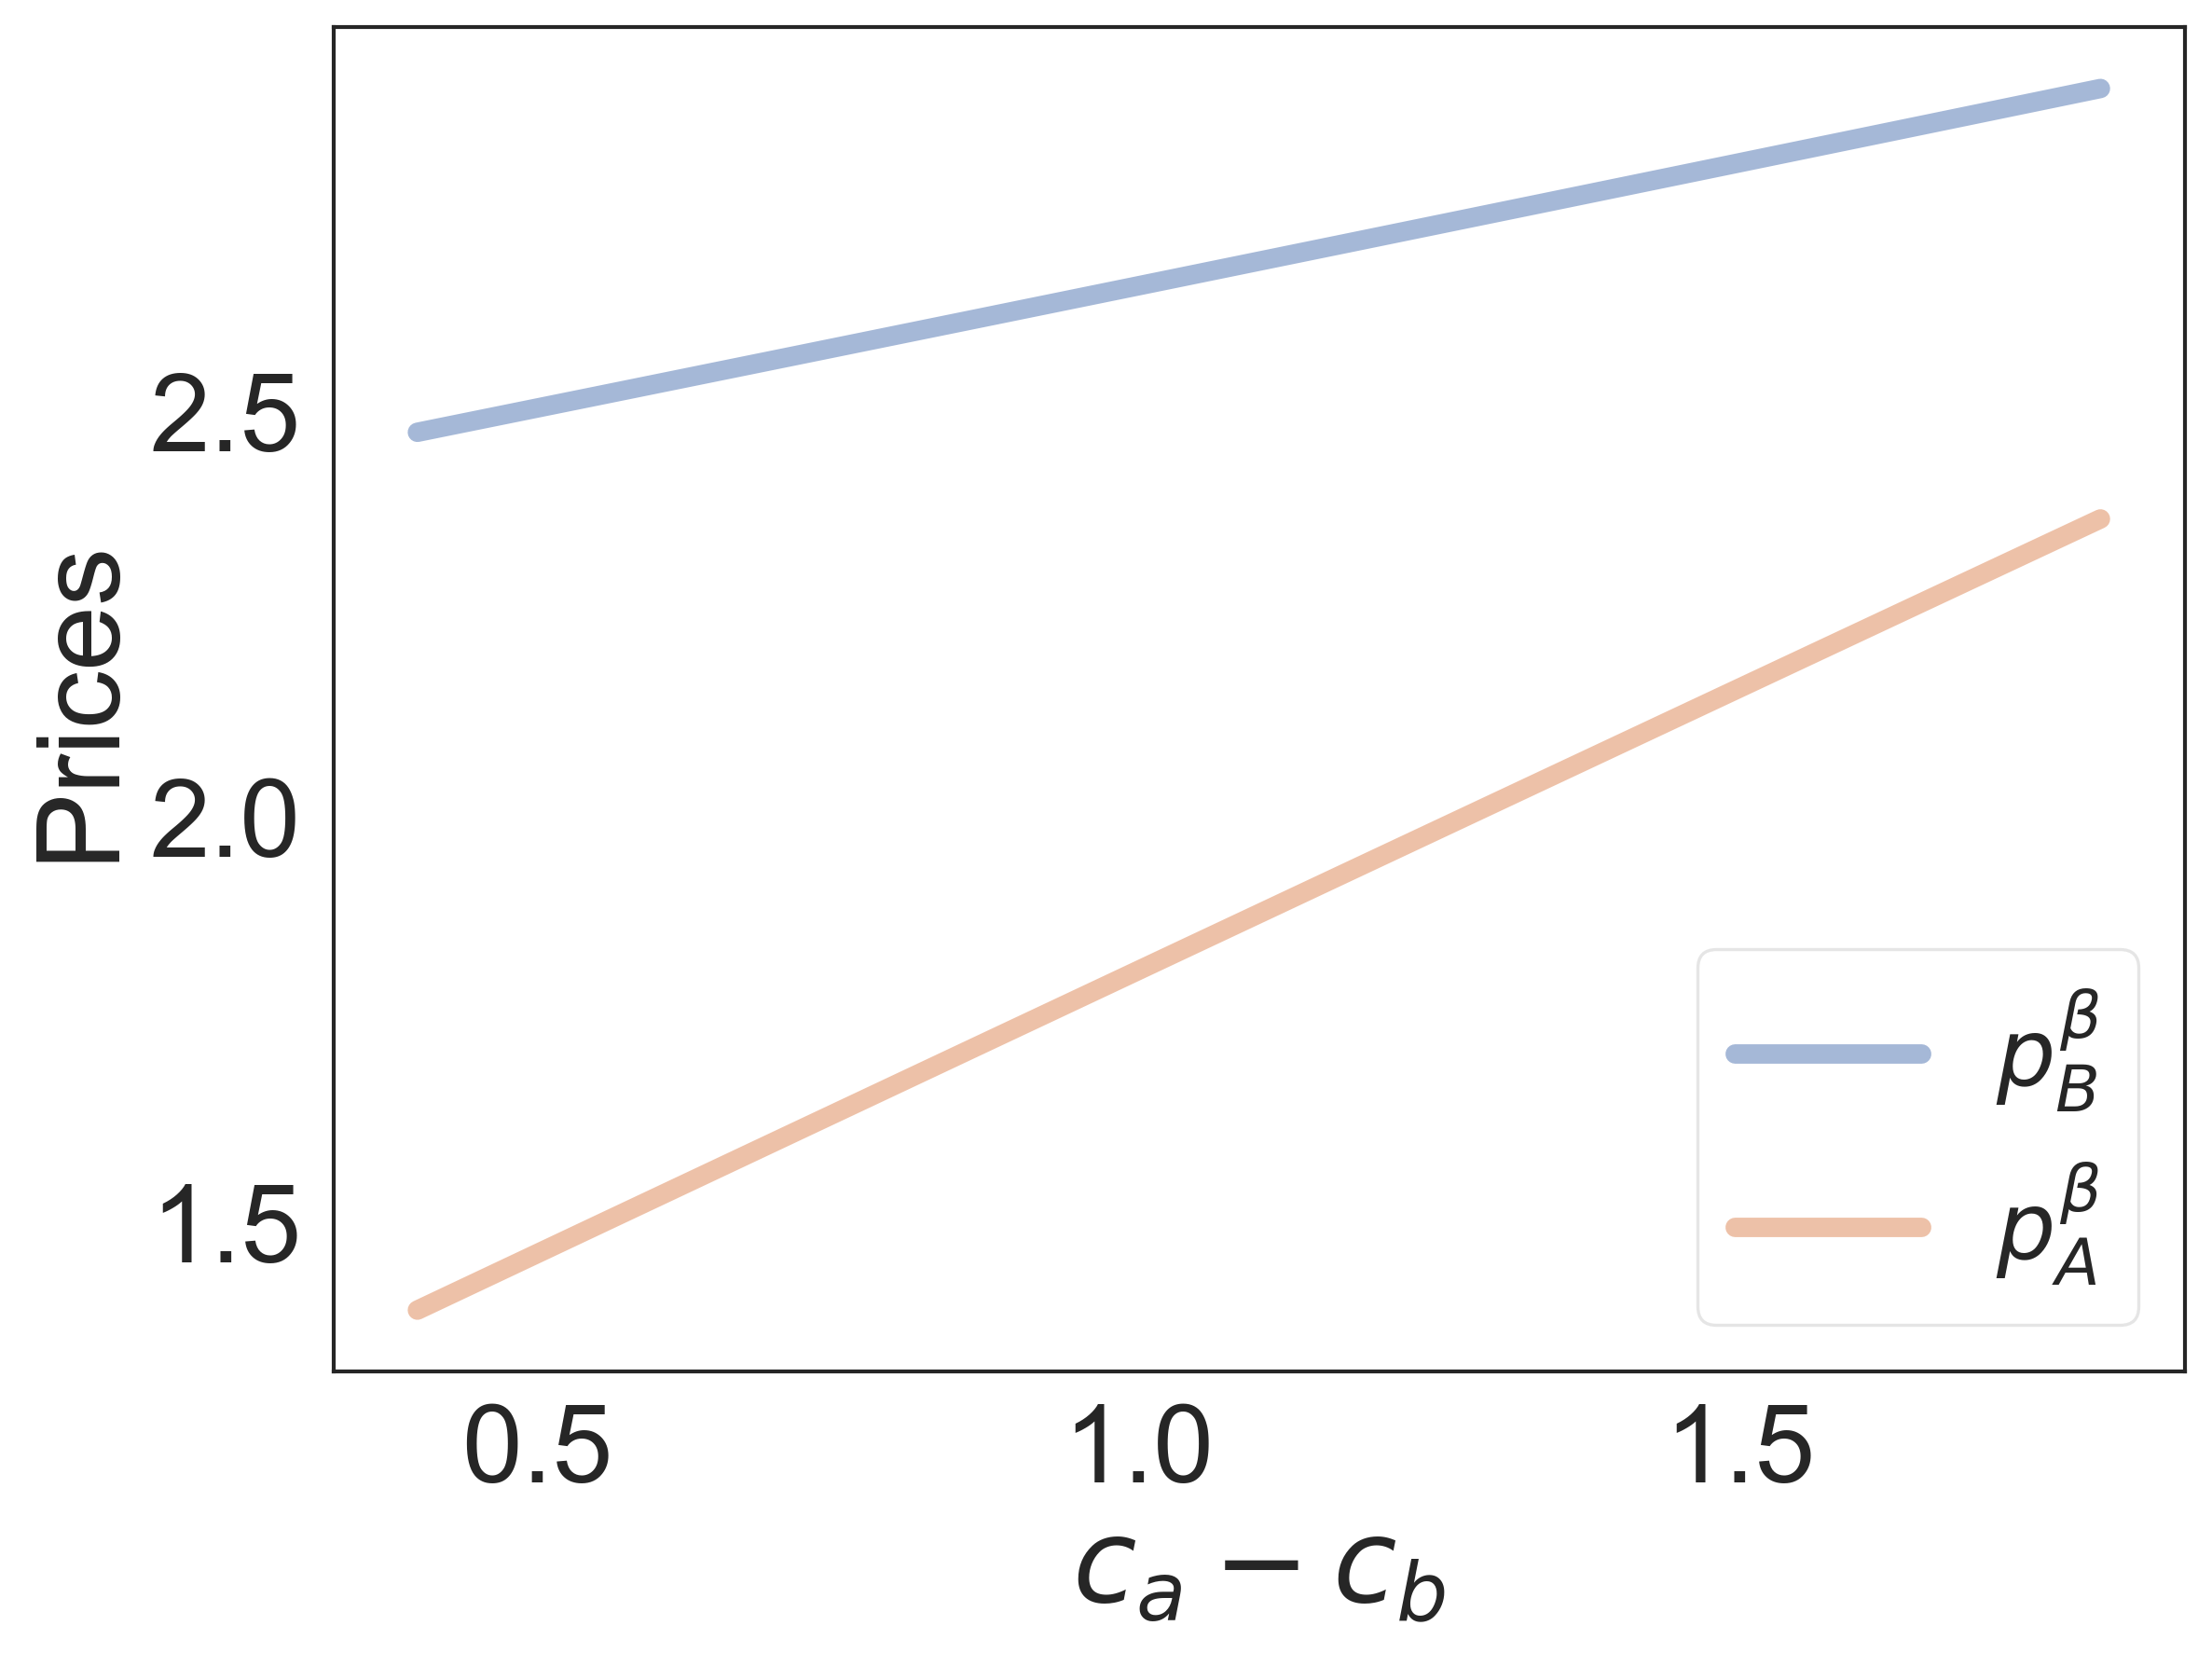

In [7]:
# plot of prices pbb and pab
labels_prices_b=[r'$p_{B}^{\beta}$',r'$p_{A}^{\beta}$']
fname_prices_b = "./output/ml_ih_fm_pbb_pab.png" if flag_plot else None
plot_curves_vs_camcb(df['pbb'],df['pab'],ca_m_cb_arr,'Prices',labels_prices_b,None,None,fname_prices_b)

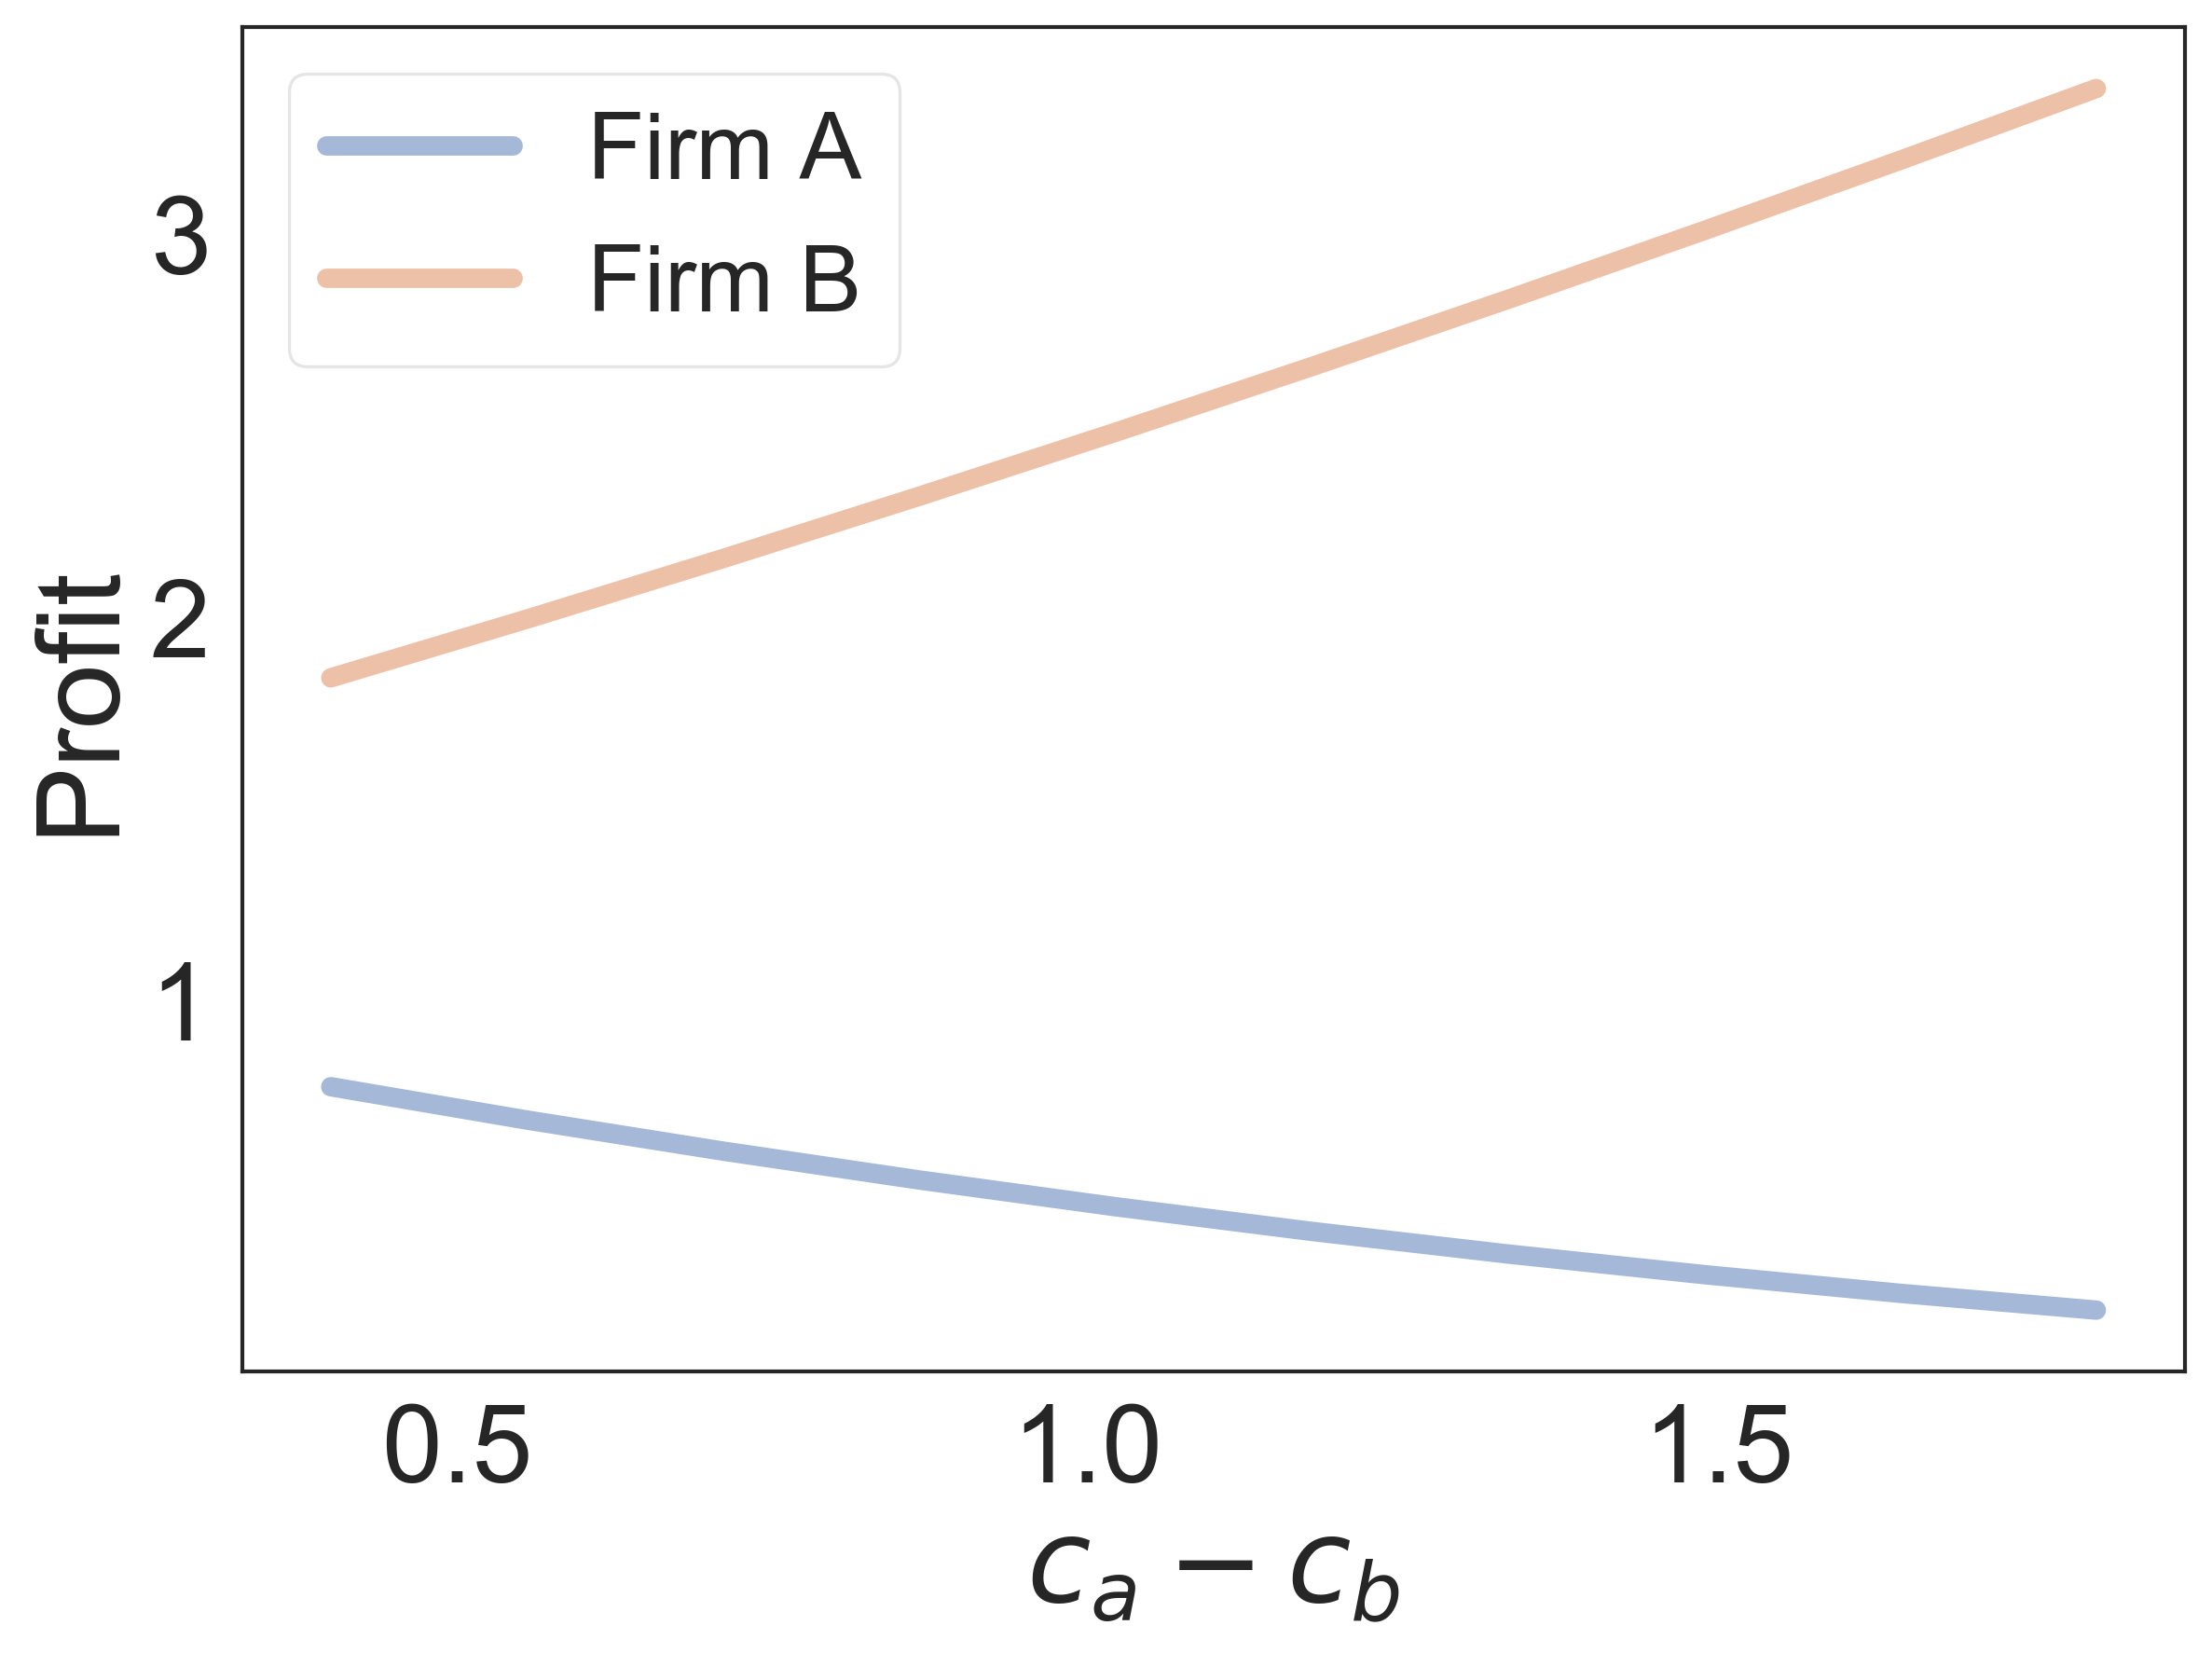

In [8]:
# plot of profits for firm A and B
labels_profit=[r'Firm A',r'Firm B']
fname_profit = "./output/ml_ih_fm_profits.png" if flag_plot else None
plot_curves_vs_camcb(df['total_profit_a'],df['total_profit_b'],ca_m_cb_arr,'Profit',labels_profit,None,None,fname_profit)

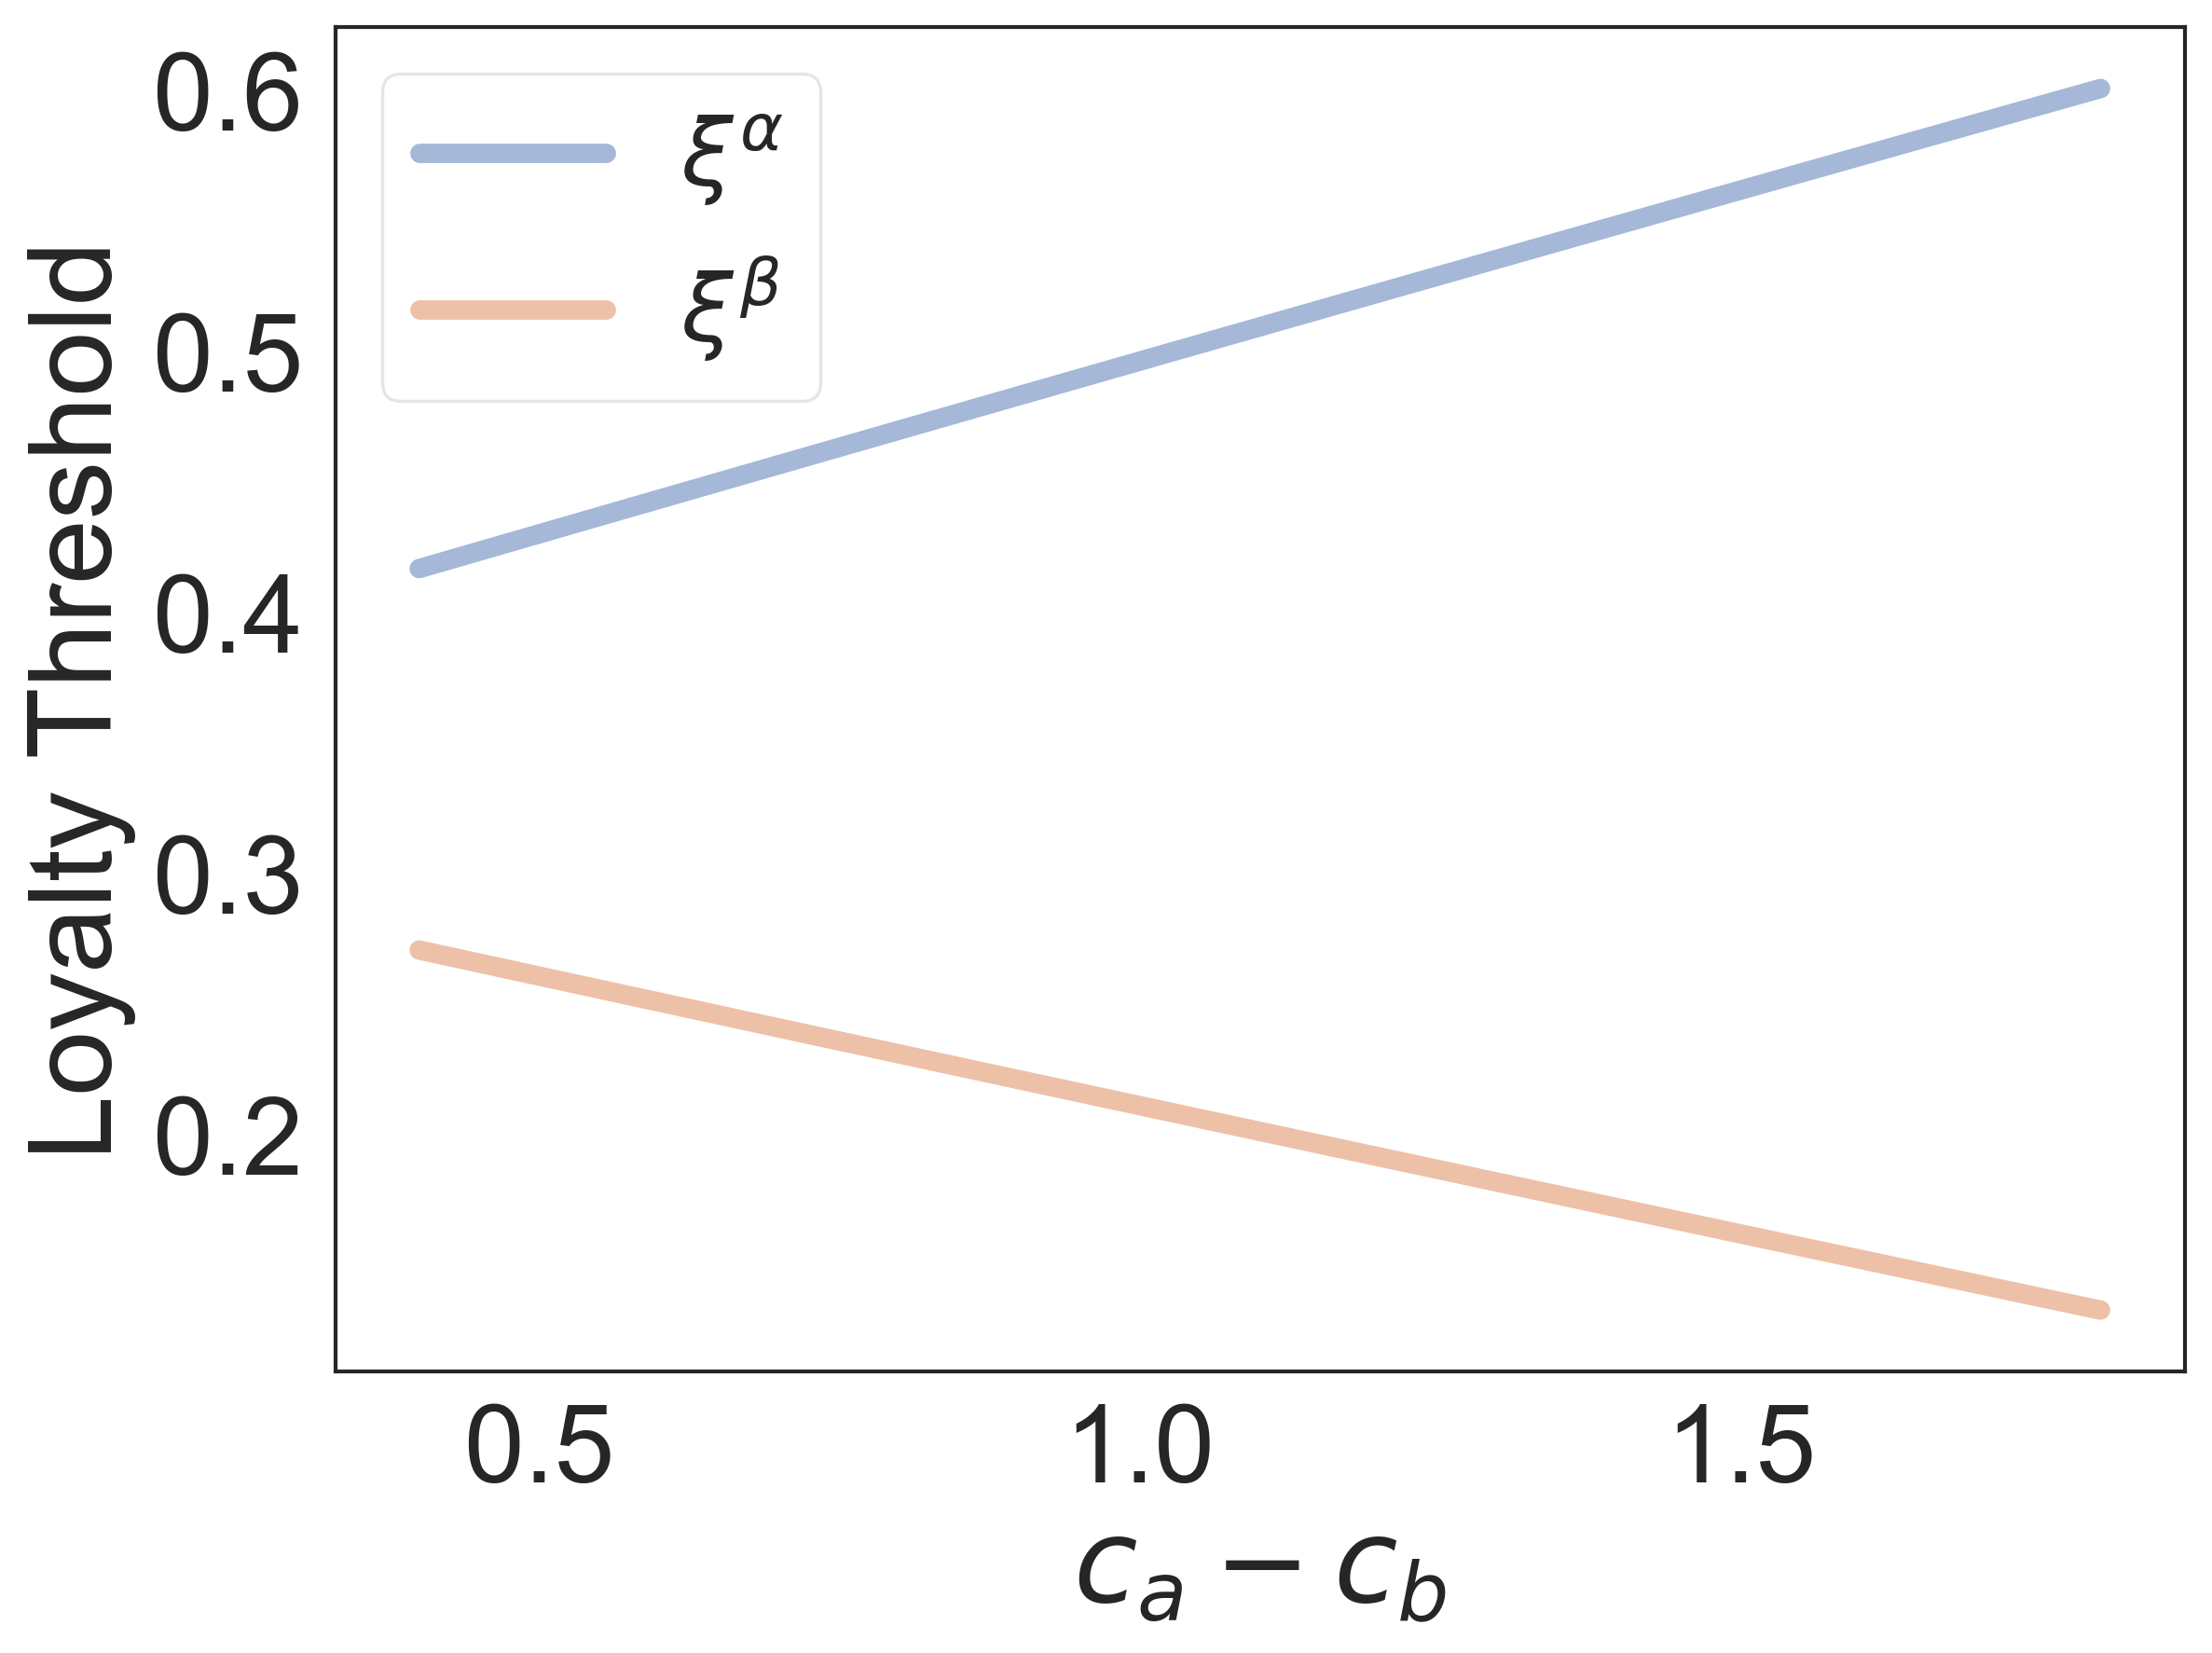

In [9]:
# plot of xia and xib
labels4=[r'$\xi^{\alpha}$',r'$\xi^{\beta}$']
fname_xis = "./output/ml_ih_fm_xis.png" if flag_plot else None
plot_curves_vs_camcb(df['xia'],df['xib'],ca_m_cb_arr,'Loyalty Threshold',labels4,None,None,fname_xis)

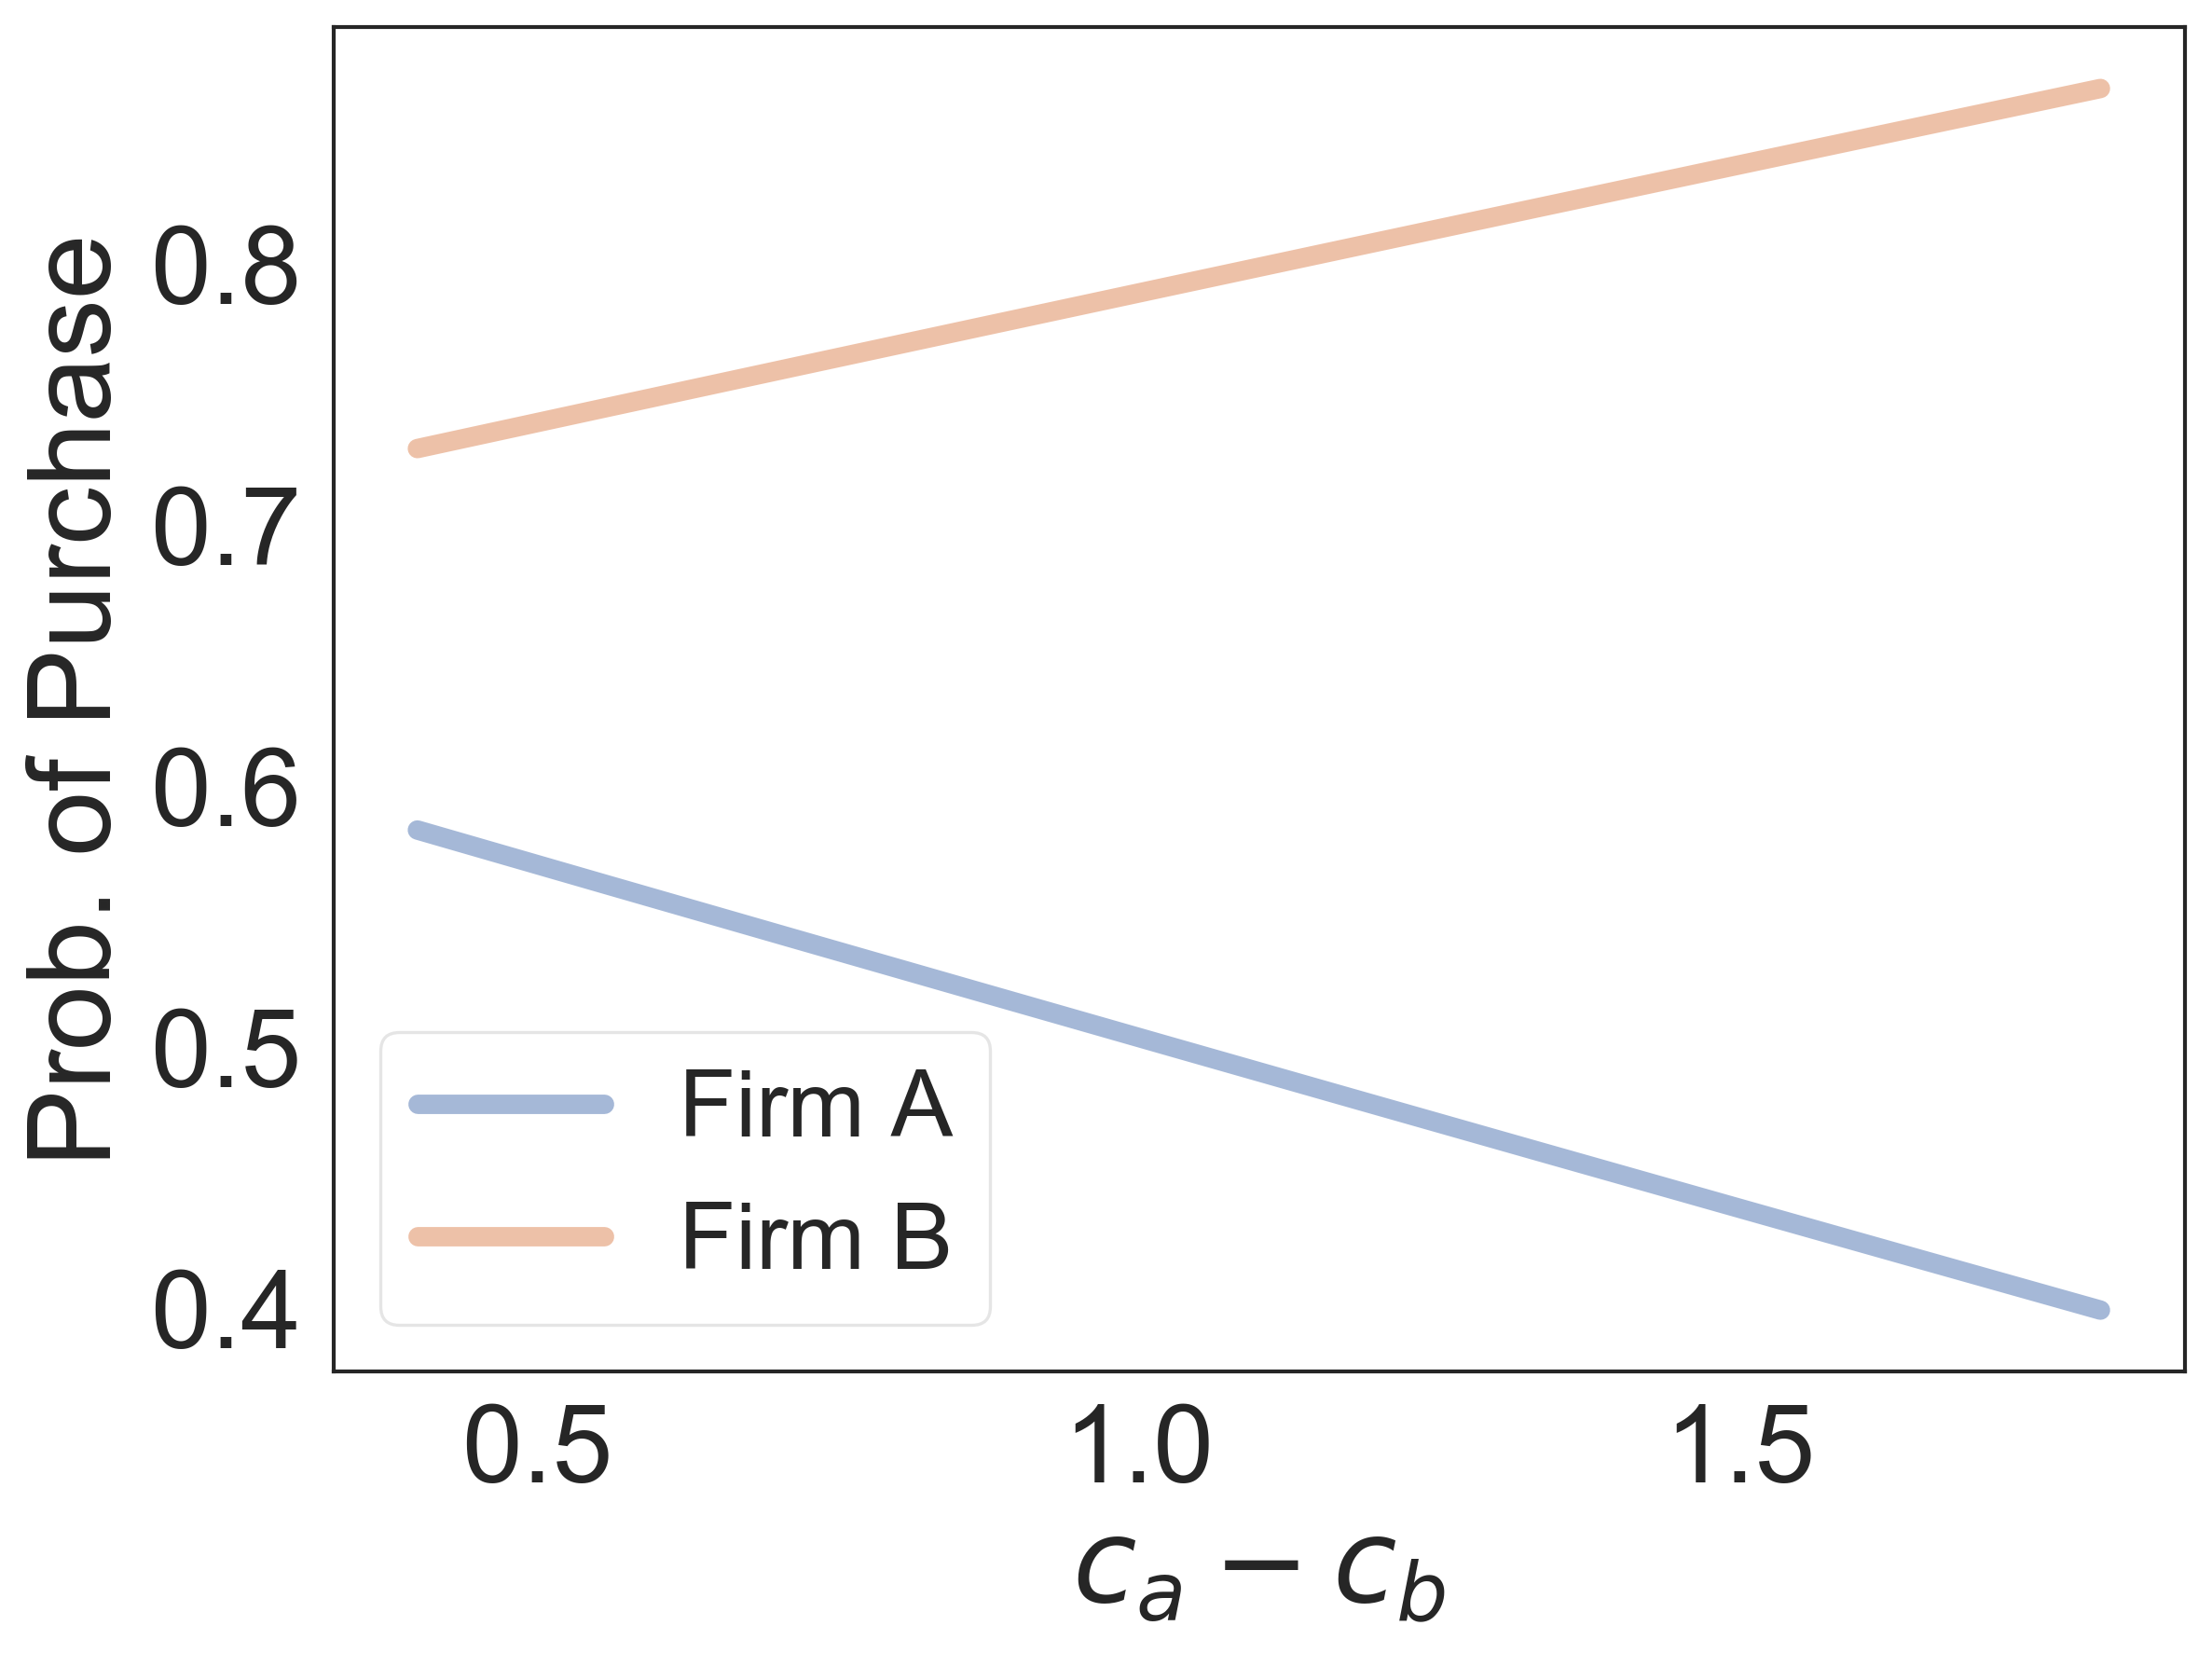

In [10]:
# plot of prob of purchase of loyal
labels_probabilities=[r'Firm A',r'Firm B']
fname_probabilities = "./output/ml_ih_fm_probabilities.png" if flag_plot else None
plot_curves_vs_camcb(df['prob_purchase_a_from_a'],df['prob_purchase_b_from_b'],ca_m_cb_arr,'Prob. of Purchase',labels_probabilities,None,None,fname_probabilities)

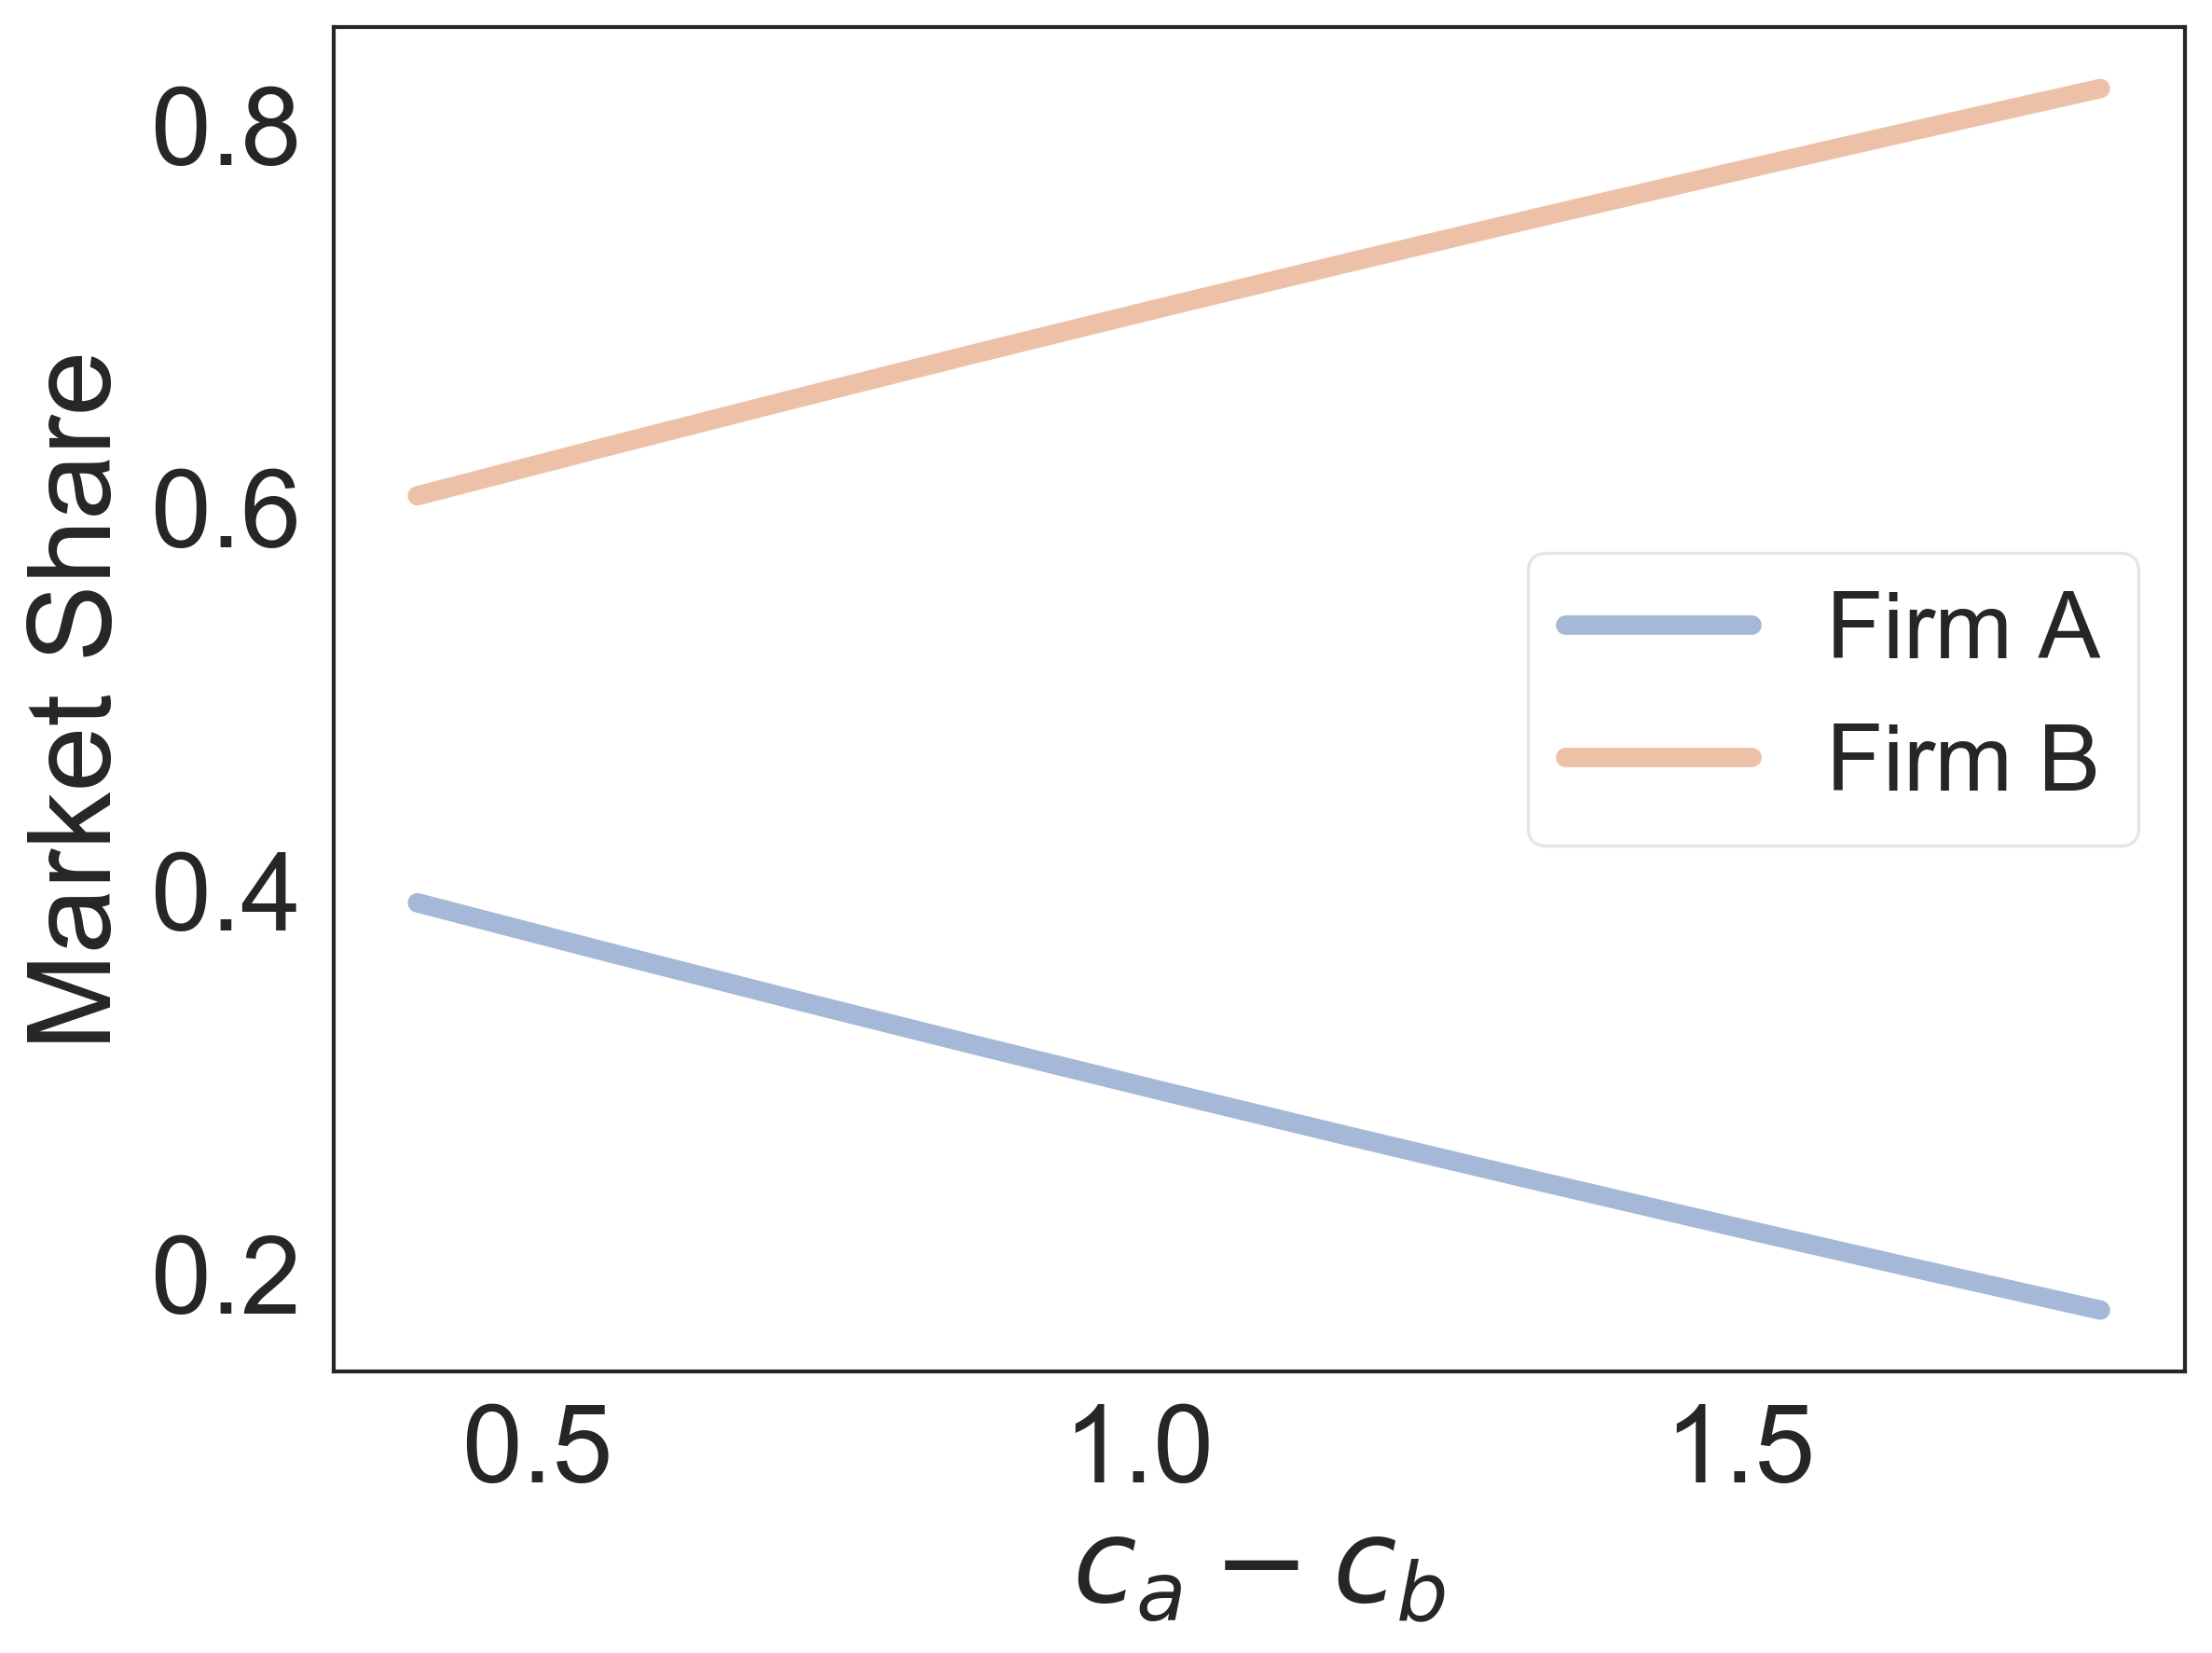

In [11]:
# plot of market share
labels_mkt=[r'Firm A',r'Firm B']
fname_mkt = "./output/ml_ih_fm_mkt.png" if flag_plot else None
plot_curves_vs_camcb(df['marketshare_a'],df['marketshare_b'],ca_m_cb_arr,'Market Share',labels_mkt,None,None,fname_mkt)